In [4]:

import numpy as np
import pandas as pd 
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('traderclassifier.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,day,user_address,base_cumulative_return,portfolio_return,daily_sharpe_ratio,trader_class,number_of_trades,unique_tokens_traded
0,2024-07-03 00:00:00.000,0x09dc02dfb7de2b150fe9a2d2ab92cf5767d423f9,-0.952872,19.799528,1.300633,Bad Trader,36.0,6.0
1,2024-09-02 00:00:00.000,0x2eb6ffcfc1591349a1983aad3e80d8fb3cec1df2,9.443217,1049.012213,3.530742,Good Trader,9.0,4.0
2,2024-06-21 00:00:00.000,0x580e4ce9d324426e8e5e2a33298a1d2fd73273a7,27.605549,2862.153698,2.276145,Good Trader,NaN,NaN
3,2024-04-08 00:00:00.000,0x448166a91e7bc50d0ac720c2fbed29e0963f5af8,0.007613,100.516119,29.420332,Average Trader,380.0,20.0
4,2024-08-10 00:00:00.000,0xb8ca7f877391032d9da4c995d64cdab3ecd03efd,-0.415733,57.618324,2.212055,Bad Trader,NaN,NaN
...,...,...,...,...,...,...,...,...
18194,2024-11-16 00:00:00.000,0x2b3ab8236a159434ce967d208c821ce1aec8ee56,22.107890,2307.759258,0.960698,NaN,NaN,NaN
18195,2024-06-07 00:00:00.000,0xadb4baa4bf3a1c176c4399402395403632b036a3,0.187292,120.244632,17.270114,Good Trader,NaN,NaN
18196,2024-11-14 00:00:00.000,0x08b505dc1603af317f8ffbf5db6359f0975d96ce,-0.527658,47.244034,0.195960,Bad Trader,NaN,NaN
18197,2024-07-16 00:00:00.000,0xa38ac89a9eceb2e00b5b05568f36815f6d9286dc,0.013748,109.311772,11.631746,Average Trader,NaN,NaN


: 

In [ ]:
# Convert 'day' column to datetime format and remove time component 
df['day'] = pd.to_datetime(df['day'], errors='coerce').dt.date
#Remove later
print(df.head())

          day                                user_address  \
0  2024-07-03  0x09dc02dfb7de2b150fe9a2d2ab92cf5767d423f9   
1  2024-09-02  0x2eb6ffcfc1591349a1983aad3e80d8fb3cec1df2   
2  2024-06-21  0x580e4ce9d324426e8e5e2a33298a1d2fd73273a7   
3  2024-04-08  0x448166a91e7bc50d0ac720c2fbed29e0963f5af8   
4  2024-08-10  0xb8ca7f877391032d9da4c995d64cdab3ecd03efd   

   base_cumulative_return  portfolio_return  daily_sharpe_ratio  \
0               -0.952872         19.799528            1.300633   
1                9.443217       1049.012213            3.530742   
2               27.605549       2862.153698            2.276145   
3                0.007613        100.516119           29.420332   
4               -0.415733         57.618324            2.212055   

     trader_class  number_of_trades  unique_tokens_traded  
0      Bad Trader              36.0                   6.0  
1     Good Trader               9.0                   4.0  
2     Good Trader               NaN               

: 

In [ ]:
# Define a function to detect outliers based on IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

#Find outliers for 'portfolio_return'
outliers = find_outliers_iqr(df, 'portfolio_return')
print(outliers)


              day                                user_address  \
1      2024-09-02  0x2eb6ffcfc1591349a1983aad3e80d8fb3cec1df2   
2      2024-06-21  0x580e4ce9d324426e8e5e2a33298a1d2fd73273a7   
21     2024-04-01  0xd0640fcb1ef5ac385b57701c5ef7030331c8d80b   
24     2024-09-03  0x6f5884a6ba14297eab47aa52c4e739f0a11ff7c1   
26     2024-09-13  0x2a45eaf79bbaff1a1d31fdd24ca67541d389ef78   
...           ...                                         ...   
18171  2024-06-29  0x1518c211f611114decd1842894e08b803afcd27b   
18175  2024-10-02  0xc8084f0227d4f857ec9d48c481abc040ec4a4f1f   
18185  2024-08-08  0x2b3ab8236a159434ce967d208c821ce1aec8ee56   
18189  2024-10-23  0xd0640fcb1ef5ac385b57701c5ef7030331c8d80b   
18194  2024-11-16  0x2b3ab8236a159434ce967d208c821ce1aec8ee56   

       base_cumulative_return  portfolio_return  daily_sharpe_ratio  \
1                9.443217e+00      1.049012e+03            3.530742   
2                2.760555e+01      2.862154e+03            2.276145   
21    

: 

: 

: 

In [ ]:
# Remove outliers from 'portfolio_return' column based on IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to remove outliers from the 'portfolio_return' column
df_clean = remove_outliers_iqr(df, 'portfolio_return')

# Verify the result
print(df_clean)


              day                                user_address  \
0      2024-07-03  0x09dc02dfb7de2b150fe9a2d2ab92cf5767d423f9   
3      2024-04-08  0x448166a91e7bc50d0ac720c2fbed29e0963f5af8   
4      2024-08-10  0xb8ca7f877391032d9da4c995d64cdab3ecd03efd   
5      2024-11-18  0xc723bd563a44940a85e64aa221001d37f30418e4   
6      2024-10-09  0xc65236e35c1e0dc9e2044f6f38c9c3497e95ffa2   
...           ...                                         ...   
18192  2024-04-28  0x448166a91e7bc50d0ac720c2fbed29e0963f5af8   
18193  2024-06-10  0xda6d5943ae71272518636e24a1da83ad0e5a85dd   
18195  2024-06-07  0xadb4baa4bf3a1c176c4399402395403632b036a3   
18196  2024-11-14  0x08b505dc1603af317f8ffbf5db6359f0975d96ce   
18197  2024-07-16  0xa38ac89a9eceb2e00b5b05568f36815f6d9286dc   

       base_cumulative_return  portfolio_return  daily_sharpe_ratio  \
0                   -0.952872         19.799528            1.300633   
3                    0.007613        100.516119           29.420332   
4     

: 

: 

: 

In [ ]:
# Check for NaN values in the entire DataFrame
print(df_clean.isna().sum())

day                           0
user_address                  0
base_cumulative_return        0
portfolio_return              0
daily_sharpe_ratio            0
trader_class                  8
number_of_trades          10909
unique_tokens_traded      10909
dtype: int64


: 

: 

: 

In [ ]:
#drop rows in trader_class column with NaN values
df_cleann = df_clean.dropna(subset=['trader_class'])
print(df_cleann.isna().sum())

day                           0
user_address                  0
base_cumulative_return        0
portfolio_return              0
daily_sharpe_ratio            0
trader_class                  0
number_of_trades          10902
unique_tokens_traded      10902
dtype: int64


: 

: 

: 

In [ ]:
#Fill NaN with 0
df_cleaned = df_cleann.fillna(0)
print(df_cleaned.isna().sum())

day                       0
user_address              0
base_cumulative_return    0
portfolio_return          0
daily_sharpe_ratio        0
trader_class              0
number_of_trades          0
unique_tokens_traded      0
dtype: int64


: 

: 

: 

In [ ]:
df_cleaned.dtypes

day                        object
user_address               object
base_cumulative_return    float64
portfolio_return          float64
daily_sharpe_ratio        float64
trader_class               object
number_of_trades          float64
unique_tokens_traded      float64
dtype: object

: 

: 

: 

In [ ]:
#convert day to datetime
df_cleaned['day'] = pd.to_datetime(df_cleaned['day'])

: 

: 

: 

In [ ]:
df_cleaned.dtypes

day                       datetime64[ns]
user_address                      object
base_cumulative_return           float64
portfolio_return                 float64
daily_sharpe_ratio               float64
trader_class                      object
number_of_trades                 float64
unique_tokens_traded             float64
dtype: object

: 

: 

: 

In [ ]:
df_cleaned.trader_class.head()

0        Bad Trader
3    Average Trader
4        Bad Trader
5        Bad Trader
6        Bad Trader
Name: trader_class, dtype: object

: 

: 

: 

In [ ]:
# Convert 'trader_class' to a categorical column
df_cleaned["trader_class"] = df_cleaned["trader_class"].astype('category')
df_cleaned["trader_class"].cat.categories

Index(['Average Trader', 'Bad Trader', 'Good Trader'], dtype='object')

: 

: 

: 

In [ ]:
df_cleaned.dtypes

day                       datetime64[ns]
user_address                      object
base_cumulative_return           float64
portfolio_return                 float64
daily_sharpe_ratio               float64
trader_class                    category
number_of_trades                 float64
unique_tokens_traded             float64
dtype: object

: 

: 

: 

In [ ]:
# Assign unique integers to categories
df_cleaned['trader_class_numeric'] = df_cleaned['trader_class'].astype('category').cat.codes
df_cleaned['trader_class_numeric']

0        1
3        0
4        1
5        1
6        1
        ..
18192    1
18193    1
18195    2
18196    1
18197    0
Name: trader_class_numeric, Length: 14762, dtype: int8

: 

: 

: 

In [ ]:
df_cleaned.head()

,day,user_address,base_cumulative_return,portfolio_return,daily_sharpe_ratio,trader_class,number_of_trades,unique_tokens_traded,trader_class_numeric
0,2024-07-03,0x09dc02dfb7de2b150fe9a2d2ab92cf5767d423f9,-0.952872,19.799528,1.300633,Bad Trader,36.0,6.0,1
3,2024-04-08,0x448166a91e7bc50d0ac720c2fbed29e0963f5af8,0.007613,100.516119,29.420332,Average Trader,380.0,20.0,0
4,2024-08-10,0xb8ca7f877391032d9da4c995d64cdab3ecd03efd,-0.415733,57.618324,2.212055,Bad Trader,0.0,0.0,1
5,2024-11-18,0xc723bd563a44940a85e64aa221001d37f30418e4,-1.000000,-2.329274,-0.525633,Bad Trader,3.0,3.0,1
6,2024-10-09,0xc65236e35c1e0dc9e2044f6f38c9c3497e95ffa2,-0.213725,78.630133,6.771244,Bad Trader,0.0,0.0,1


: 

: 

: 

In [ ]:
df_cleaned.columns

Index(['day', 'user_address', 'base_cumulative_return', 'portfolio_return',
       'daily_sharpe_ratio', 'trader_class', 'number_of_trades',
       'unique_tokens_traded', 'trader_class_numeric'],
      dtype='object')

: 

: 

: 

# Correlation Coefficient Analysis

In [ ]:
# Correlation Coefficient Analysis

df_cor = df_cleaned.corr(numeric_only=True)
print(df_cor['trader_class_numeric'].sort_values(ascending=False))



trader_class_numeric      1.000000
portfolio_return          0.271778
base_cumulative_return    0.238708
unique_tokens_traded     -0.025116
number_of_trades         -0.025140
daily_sharpe_ratio       -0.055742
Name: trader_class_numeric, dtype: float64


: 

: 

: 

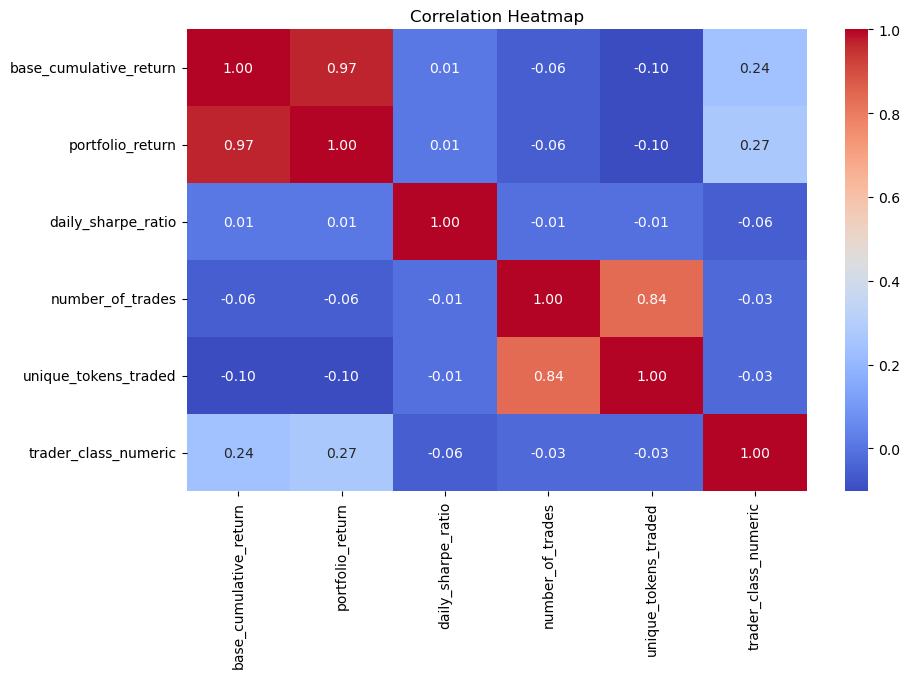

: 

: 

: 

In [ ]:
import seaborn as sns 

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Classifier Model

In [ ]:
df_cleaned.dtypes

day                       datetime64[ns]
user_address                      object
base_cumulative_return           float64
portfolio_return                 float64
daily_sharpe_ratio               float64
trader_class                    category
number_of_trades                 float64
unique_tokens_traded             float64
trader_class_numeric                int8
dtype: object

: 

: 

: 

In [ ]:
numeric = df_cleaned.select_dtypes(include=['number'])
#numeric

: 

: 

: 

In [ ]:
features = ['base_cumulative_return', 'portfolio_return', 
            'daily_sharpe_ratio', 'number_of_trades', 'unique_tokens_traded']

: 

: 

: 

In [ ]:
target = 'trader_class_numeric'

: 

: 

: 

In [ ]:
df_cleaned['portfolio_return'].describe()

count    14762.000000
mean        95.300985
std         39.273272
min         -2.588934
25%         75.324286
50%         99.954442
75%        114.412935
max        233.001848
Name: portfolio_return, dtype: float64

: 

: 

: 

In [ ]:
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score


: 

: 

: 

In [ ]:
#Data Processing
#Separating the features from the target variable.

X = df_cleaned[features]
y = df_cleaned[target]

: 

: 

: 

In [ ]:
#Normalize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

: 

: 

: 

### Split the data

In [ ]:
#Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



: 

: 

: 

# Train the Logistic Regression Model

In [ ]:
#Train the logistic Regression Model
log_reg = LogisticRegression(solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
log_reg.fit(X_train, y_train)

LogisticRegression()

: 

: 

: 

# Predict on the test set

In [ ]:
#predict on the test set
y_pred = log_reg.predict(X_test)

: 

: 

: 

# Evaluate the Model

##### Confusion Matrix

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 804    8    3]
 [  51 1462    0]
 [   1    0  624]]


: 

: 

: 

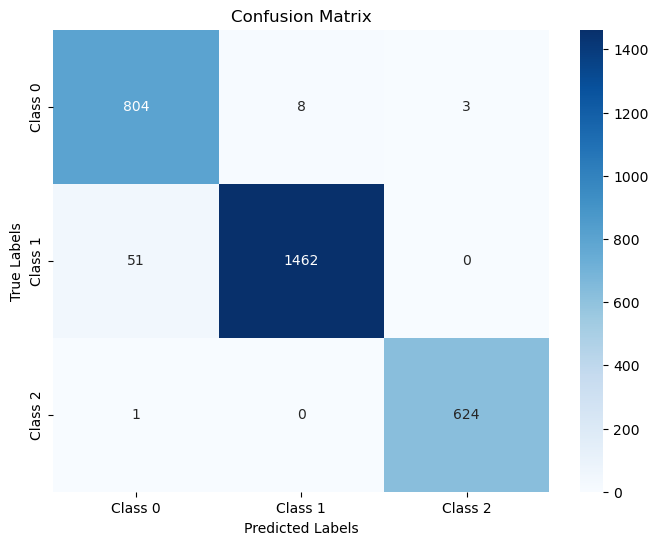

: 

: 

: 

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#Result: Correct predictions (True Positives for each class).

#### Classification Report

In [ ]:
report = classification_report(y_test, y_pred,output_dict=True)
print("Classification Report:")
print(report)

Classification Report:
{'0': {'precision': 0.9392523364485982, 'recall': 0.9865030674846625, 'f1-score': 0.9622980251346499, 'support': 815.0}, '1': {'precision': 0.9945578231292517, 'recall': 0.9662921348314607, 'f1-score': 0.9802212537713711, 'support': 1513.0}, '2': {'precision': 0.9952153110047847, 'recall': 0.9984, 'f1-score': 0.9968051118210862, 'support': 625.0}, 'accuracy': 0.9786657636302065, 'macro avg': {'precision': 0.9763418235275448, 'recall': 0.9837317341053744, 'f1-score': 0.9797747969090357, 'support': 2953.0}, 'weighted avg': {'precision': 0.9794331899688979, 'recall': 0.9786657636302065, 'f1-score': 0.9787845724107698, 'support': 2953.0}}


: 

: 

: 

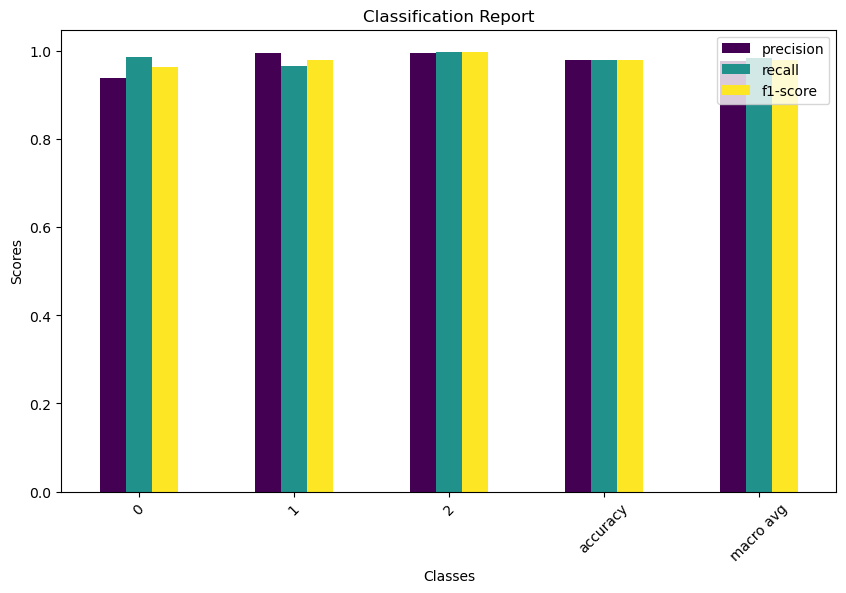

: 

: 

: 

In [ ]:
# Convert the dictionary to a DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Plot the precision, recall, and f1-score
report_df = report_df.iloc[:-1, :-1]  # Exclude support and accuracy row/column
report_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Classification Report")
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.show()

#### Accuracy Score

In [ ]:
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9786657636302065


: 

: 

: 

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


: 

: 

: 

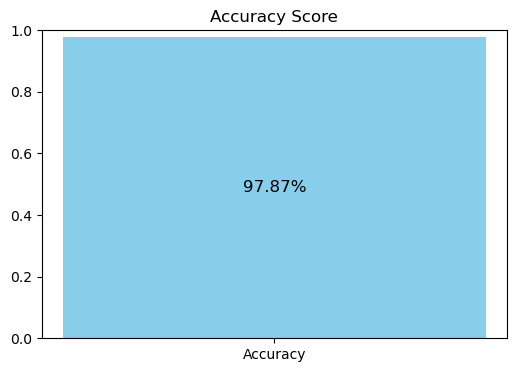

: 

: 

: 

In [ ]:
# Display accuracy in a plot
plt.figure(figsize=(6, 4))
plt.bar(["Accuracy"], [accuracy], color="skyblue")
plt.ylim(0, 1)  # Scale from 0 to 1
plt.title("Accuracy Score")
plt.text(0, accuracy / 2, f"{accuracy:.2%}", ha="center", va="center", fontsize=12)
plt.show()

#### AUROC Curve

In [ ]:
# Calculate AUROC
# Get predicted probabilities for all classes
y_pred_multi = log_reg.predict_proba(X_test)

# Calculate AUROC for multi-class classification
auroc_multi = roc_auc_score(y_test, y_pred_multi, multi_class='ovr')
print(f"Area Under the ROC Curve (AUROC) for Multi-Class: {auroc_multi:.2f}")

Area Under the ROC Curve (AUROC) for Multi-Class: 1.00


: 

: 

: 

# Interpret the Model

#### Logistic regression provides coefficients that indicate feature importance

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(feature_importance)

                  Feature  Coefficient
0  base_cumulative_return     2.083490
1        portfolio_return     1.165579
2      daily_sharpe_ratio     0.314153
3        number_of_trades     0.141990
4    unique_tokens_traded     0.137264


: 

: 

: 

##### Save the model

In [ ]:
import pickle

model_file = 'logistic_regression_model.bin'
model_file

: 

: 

: 

In [ ]:
f_out = open(model_file, 'wb')
pickle.dump((log_reg), f_out)
f_out.close()

: 

: 

: 

In [ ]:


# Save the trained model to a .bin file


with open(model_file, 'wb') as f_out:
    pickle.dump(log_reg, f_out)

print(f"Model saved to {model_file}")


: 

: 

: 

#### Load the model from the Pickle File

In [ ]:
# # Load the model from the .bin file
# with open(model_file, 'rb') as f_in:
#     loaded_model = pickle.load(f_in)

# print("Model loaded successfully!")

# # Verify by predicting on the test set
# y_pred_loaded = loaded_model.predict(X_test)

# # Compare predictions from the original and loaded models
# assert (y_pred == y_pred_loaded).all(), "Mismatch between original and loaded model predictions!"

# print("Loaded model predictions match the original!")


: 

: 

# Randomized Search for Hyperparameter Tuning

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# # Define the parameter distribution
# param_distributions = {
#     'C': np.logspace(-4, 4, 20),  # Exponential range for regularization
#     'solver': ['liblinear', 'lbfgs'],
#     'penalty': ['l1', 'l2'],
#     'max_iter': [100, 200, 300]
# }

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=log_reg,
#     param_distributions=param_distributions,
#     n_iter=50,  # Number of parameter settings sampled
#     cv=5,
#     scoring='accuracy',
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# # Fit the model to the training data
# random_search.fit(X_train, y_train)

# # Display best parameters and accuracy
# print("Best Parameters (Random Search):", random_search.best_params_)
# print(f"Best Cross-Validation Accuracy (Random Search): {random_search.best_score_:.2f}")

# # Use the best estimator for predictions
# best_model_random = random_search.best_estimator_
# y_pred_random = best_model_random.predict(X_test)

# # Evaluate the tuned model
# print("\nConfusion Matrix (Tuned Model - Random Search):")
# print(confusion_matrix(y_test, y_pred_random))
# print("\nClassification Report (Tuned Model - Random Search):")
# print(classification_report(y_test, y_pred_random))
# print(f"\nAccuracy (Tuned Model - Random Search): {accuracy_score(y_test, y_pred_random):.2f}")


: 

: 

: 